In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [58]:
df = pd.read_csv('../data/haberler.csv')
df.head()

,Unnamed: 0,id,title,content,url,keywords,date,status,counter,topic
0,0,60,Sürücüsüz otomobil yola çıktı,"Modifiye otomobil 12 solar, 12 kamera, dokuz r...",https://www.ntv.com.tr/teknoloji/surucusuz-oto...,NaN,2017-11-27 15:00:01,2,2,teknoloji
1,1,63,Akıllı telefon bağımlılığına karşı 'Vekil Tele...,"Avusturyalı bir tasarımcı, akıllı telefon bağı...",https://www.ntv.com.tr/teknoloji/akilli-telefo...,NaN,2017-11-27 15:00:06,2,2,teknoloji
2,2,106,iPhone X iPhone 8 Plus'a karşı: Daha küçük kas...,8 inçlik bir ekrana ev sahipliği yapan iPhone ...,https://www.ntv.com.tr/teknoloji/iphone-x-ipho...,NaN,2017-11-28 11:00:03,2,1,teknoloji
3,3,141,Avrupa devleri hibrit elektrikli uçak için kol...,"BBC\'de yer alan habere göre, Fransız Airbus, ...",https://www.ntv.com.tr/teknoloji/avrupa-devler...,NaN,2017-11-28 20:00:07,2,0,teknoloji
4,4,158,11 yaşındaki kız 25 bin dolar değerindeki bili...,Geliştirdiği bir cihazla içme suyunun içindeki...,https://www.ntv.com.tr/teknoloji/11-yasindaki-...,NaN,2017-11-29 08:00:06,2,2,teknoloji


In [59]:
df['topic'].unique()

array(['teknoloji', 'sanat', 'politika', 'ekonomi', 'spor'], dtype=object)

In [60]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 10000
)

tfidf.fit(df.content)
text = tfidf.transform(df.content)

### K-Means Algorithm
**Input:** number of clusters k

**Output:** centers {c1, c2, ..., ck} implicitly dividing  P into k clusters

- Initialize k initial centers
- while stopping criterion has not been met:
        - for i =

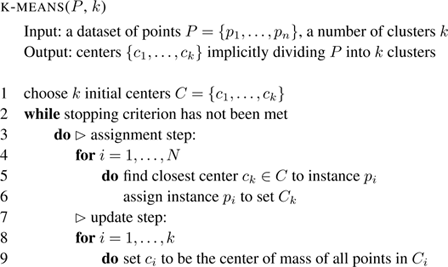

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


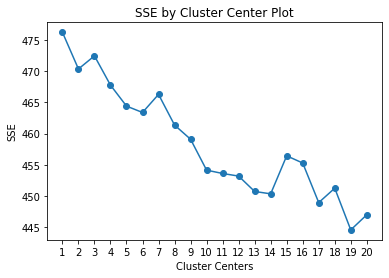

In [61]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=16, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [62]:
clusters = MiniBatchKMeans(n_clusters=5, batch_size=16, random_state=20).fit_predict(text)

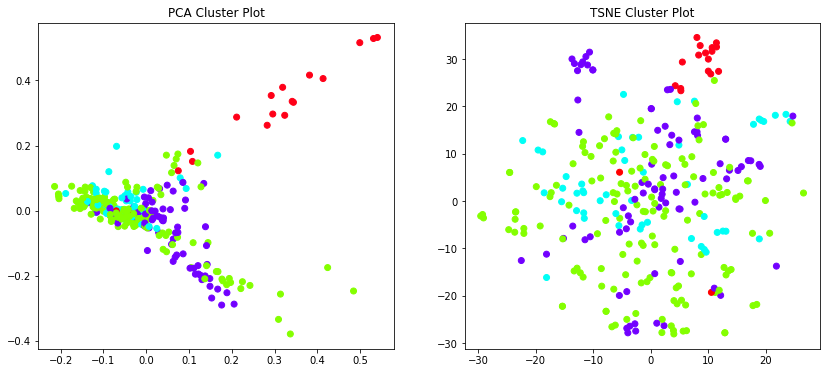

In [63]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [64]:
with open('../data/tr-stopwords') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
stopwords = [x.strip() for x in content]

In [65]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words=stopwords
)
tfidf.fit(df.content)
text = tfidf.transform(df.content)

In [68]:
clusters = MiniBatchKMeans(n_clusters=5, batch_size=16, random_state=20).fit_predict(text)
#clusters = DBSCAN(eps=1, min_samples=2).fit_predict(text)

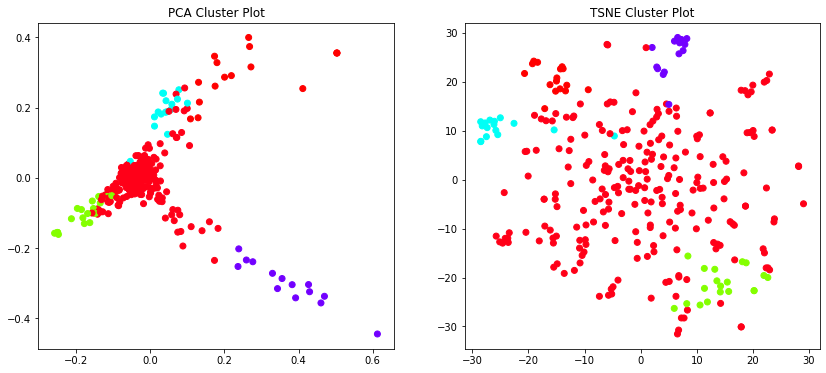

In [70]:
plot_tsne_pca(text, clusters)

In [12]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
takım,oynanacak,lig,fenerbahçe,muslera,maçında,süper,gol,galatasaray,beşiktaş

Cluster 1
cumhurbaşkanı,başkanı,ın,rıza,kemal,genel,erdoğan,sarraf,kılıçdaroğlu,chp

Cluster 2
fenerbahçe,oscar,in,öne,başardı,sol,ilk,farkı,the,dakikada

Cluster 3
imalat,11,ayı,sanayi,12,ayında,enflasyon,kasım,endeksi,yüzde

Cluster 4
büyük,yer,yıl,son,devam,ilk,in,ın,yeni,türkiye
